In [1]:
import pandas as pd
import numpy as np
# 读取链家北京租房信息
file_path = open('链家北京租房数据.csv',encoding='GBK')
file_data = pd.read_csv(file_path)
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


## 数据预处理
### 重复值和空值处理

In [2]:
# 重复数据检测
file_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8218    False
8219    False
8220    False
8221    False
8222    False
Length: 8223, dtype: bool

In [3]:
# 删除重复数据，并对file_data重新赋值
file_data = file_data.drop_duplicates()
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


In [4]:
# 删除缺失数据，并对file_data重新赋值
file_data = file_data.dropna()
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


### 数据转换类型

In [5]:
# 创建一个空数组
data_new = np.array([])
# 取出“面积”一列数据，将每个数据末尾的中文字符去除
data = file_data['面积(㎡)'].values
for i in data:
              data_new = np.append(data_new, np.array(i[:-2]))
# 通过astype()方法将str类型转换为float64类型
data = data_new.astype(np.float64)
# 用新的数据替换
file_data.loc[:,'面积(㎡)']= data
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4房间2卫,59.0,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


In [6]:
# 获取“户型”一列数据
housetype_data = file_data['户型']
temp_list = []
# 通过replace()方法进行替换
for i in housetype_data:
    new_info = i.replace('房间','室')
    temp_list.append(new_info)
file_data.loc[:,'户型'] = temp_list
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2卫,59.0,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


## 图表分析
### 房源数量、位置分布分析

In [7]:
 # 创建一个DataFrame对象，该对象只有两列数据：区域和数量
new_df = pd.DataFrame({'区域':file_data['区域'].unique(),'数量':[0]*13})
new_df

,区域,数量
0,东城,0
1,丰台,0
2,亦庄开发区,0
3,大兴,0
4,房山,0
5,昌平,0
6,朝阳,0
7,海淀,0
8,石景山,0
9,西城,0


In [8]:
# 按“区域”列将file_data进行分组，并统计每个分组的数量
groupy_area = file_data.groupby(by='区域').count()
new_df['数量'] = groupy_area.values
new_df

,区域,数量
0,东城,282
1,丰台,577
2,亦庄开发区,147
3,大兴,362
4,房山,180
5,昌平,347
6,朝阳,1597
7,海淀,605
8,石景山,175
9,西城,442


In [9]:
# 按“数量”一列从大到小排列
new_df.sort_values(by=['数量'], ascending=False)

,区域,数量
6,朝阳,1597
7,海淀,605
1,丰台,577
10,通州,477
9,西城,442
3,大兴,362
5,昌平,347
12,顺义,297
11,门头沟,285
0,东城,282


In [10]:
# 增加位置一列
file_data['位置'] = '北京市'+file_data['区域'].values +'区' + file_data['小区名称'].values
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月),位置
0,东城,万国城MOMA,1室0厅,59.11,10000,北京市东城区万国城MOMA
1,东城,北官厅胡同2号院,3室0厅,56.92,6000,北京市东城区北官厅胡同2号院
2,东城,和平里三区,1室1厅,40.57,6900,北京市东城区和平里三区
3,东城,菊儿胡同,2室1厅,57.09,8000,北京市东城区菊儿胡同
4,东城,交道口北二条35号院,1室1厅,42.67,5500,北京市东城区交道口北二条35号院
...,...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500,北京市顺义区怡馨家园
8219,顺义,旭辉26街区,4室2卫,59.0,5000,北京市顺义区旭辉26街区
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800,北京市顺义区前进花园玉兰苑
8221,顺义,双裕小区,2室1厅,71.81,4200,北京市顺义区双裕小区


In [11]:
# 获取经纬度
# coding=utf-8
# import requests
# import pandas as pd
# import time
# import json
# class LngLat:
#     # 获取位置一列的数据
#     def get_data(self):
#         house_names = file_data['位置']
#         house_names = house_names.tolist()
#         return house_names
#     def get_url(self):
#         url_temp = "http://api.map.baidu.com/geocoder/v2/?address={}&output=json&ak=NnQokv12fkyf4YoG59j9fRbGq4G8Lb4K&callback=showLocation"
#         house_names = self.get_data()
#         return [url_temp.format(i) for i in house_names]
#     # 发送请求
#     def parse_url(self, url):
#         while 1:
#             try:
#                 r = requests.get(url)
#             except requests.exceptions.ConnectionError:
#                 time.sleep(2)
#                 continue
#             return r.content.decode('UTF-8')
            
#     def run(self):
#         li = []
#         urls = self.get_url()
#         for url in urls:
#             data = self.parse_url(url)
#             str = data.split("{")[-1].split("}")[0]
#             try:
#                 lng = float(str.split(",")[0].split(":")[1])
#                 lat = float(str.split(",")[1].split(":")[1])
#             except ValueError:
#                 continue
#             # 构建字典
#             dict_data = dict(lng=lng, lat=lat, count=1)
#             li.append(dict_data)
#         f = open(r'经纬度信息.txt', 'w')
#         f.write(json.dumps(li))
#         f.close()
#         print('正在写入...')
#         print('写入成功')
# if __name__ == '__main__':
#     execute = LngLat()
#     execute.run()
# 输出结果如下 
# '正在写入...'
# '写入成功'

### 户型数量分析

In [12]:
# 定义函数，用于计算各户型的数量
def all_house(arr):
    arr = np.array(arr)
    key = np.unique(arr)
    result = {}
    for k in key:
        mask = (arr == k)
        arr_new = arr[mask]
        v = arr_new.size
        result[k] = v
    return result
# 获取户型数据
house_array = file_data['户型']
house_info = all_house(house_array)
house_info

{'0室0厅': 1,
 '1室0卫': 10,
 '1室0厅': 244,
 '1室1卫': 126,
 '1室1厅': 844,
 '1室2厅': 13,
 '2室0卫': 1,
 '2室0厅': 23,
 '2室1卫': 120,
 '2室1厅': 2249,
 '2室2卫': 22,
 '2室2厅': 265,
 '2室3厅': 1,
 '3室0卫': 3,
 '3室0厅': 12,
 '3室1卫': 92,
 '3室1厅': 766,
 '3室2卫': 48,
 '3室2厅': 489,
 '3室3卫': 1,
 '3室3厅': 10,
 '4室1卫': 15,
 '4室1厅': 58,
 '4室2卫': 24,
 '4室2厅': 191,
 '4室3卫': 5,
 '4室3厅': 9,
 '4室5厅': 2,
 '5室0卫': 1,
 '5室0厅': 1,
 '5室1卫': 3,
 '5室1厅': 7,
 '5室2卫': 7,
 '5室2厅': 49,
 '5室3卫': 3,
 '5室3厅': 24,
 '5室4厅': 1,
 '5室5厅': 1,
 '6室0厅': 1,
 '6室1卫': 1,
 '6室1厅': 1,
 '6室2厅': 5,
 '6室3卫': 2,
 '6室3厅': 6,
 '6室4卫': 2,
 '7室1厅': 1,
 '7室2厅': 2,
 '7室3厅': 3,
 '7室4厅': 1,
 '8室4厅': 2,
 '9室1厅': 2,
 '9室2厅': 1,
 '9室5厅': 2}

In [13]:
# 使用字典推导式
house_type = dict((key, value) for key, value 
in house_info.items() if value > 50)
show_houses = pd.DataFrame({'户型':[x for x in  house_type.keys()],
                  '数量':[x for x in house_type.values()]})
show_houses

,户型,数量
0,1室0厅,244
1,1室1卫,126
2,1室1厅,844
3,2室1卫,120
4,2室1厅,2249
5,2室2厅,265
6,3室1卫,92
7,3室1厅,766
8,3室2厅,489
9,4室1厅,58


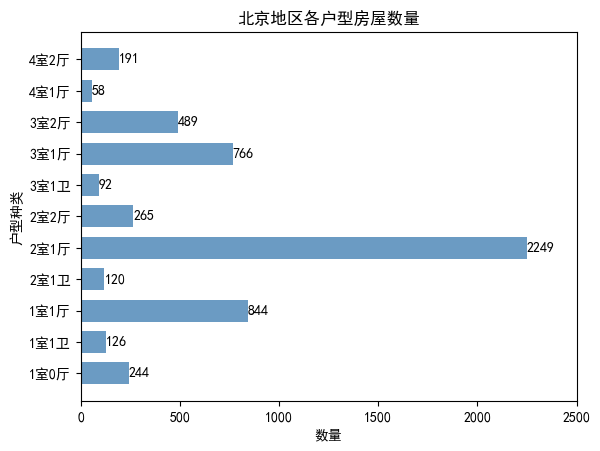

In [14]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
house_type = show_houses['户型']
house_type_num = show_houses['数量']
plt.barh(range(11), house_type_num, height=0.7, 
color='steelblue', alpha=0.8)     
plt.yticks(range(11), house_type)
plt.xlim(0,2500)
plt.xlabel("数量")
plt.ylabel("户型种类")
plt.title("北京地区各户型房屋数量")
for x, y in enumerate(house_type_num):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
plt.show()

### 平均租金分析

In [15]:
# 新建一个DataFrame对象，设置房租总金额和总面积初始值为0
df_all = pd.DataFrame({'区域':file_data['区域'].unique(),
                         '房租总金额':[0]*13,
                         '总面积(㎡)':[0]*13})
df_all

,区域,房租总金额,总面积(㎡)
0,东城,0,0
1,丰台,0,0
2,亦庄开发区,0,0
3,大兴,0,0
4,房山,0,0
5,昌平,0,0
6,朝阳,0,0
7,海淀,0,0
8,石景山,0,0
9,西城,0,0


In [16]:
# 求总金额和总面积
sum_price = file_data['价格(元/月)'].groupby(file_data['区域']).sum()
sum_area = file_data['面积(㎡)'].groupby(file_data['区域']).sum()
df_all['房租总金额'] = sum_price.values
df_all['总面积(㎡)'] = sum_area.values
df_all

,区域,房租总金额,总面积(㎡)
0,东城,3945550,27353.99
1,丰台,4404893,50922.79
2,亦庄开发区,1318400,15995.53
3,大兴,2286950,35884.15
4,房山,726750,15275.41
5,昌平,2521515,35972.92
6,朝阳,20281396,166921.72
7,海淀,7279350,57210.39
8,石景山,1156500,13956.67
9,西城,5636975,37141.64


In [17]:
# 计算各区域每平米房租价格,并保留两位小数
df_all['房租总金额'] = df_all['房租总金额'].astype(float)
df_all['总面积(㎡)'] = df_all['总面积(㎡)'].astype(float)
df_all['每平米租金(元)'] = round(df_all['房租总金额']/df_all['总面积(㎡)'], 2)
df_all

,区域,房租总金额,总面积(㎡),每平米租金(元)
0,东城,3945550.0,27353.99,144.24
1,丰台,4404893.0,50922.79,86.50
2,亦庄开发区,1318400.0,15995.53,82.42
3,大兴,2286950.0,35884.15,63.73
4,房山,726750.0,15275.41,47.58
5,昌平,2521515.0,35972.92,70.09
6,朝阳,20281396.0,166921.72,121.50
7,海淀,7279350.0,57210.39,127.24
8,石景山,1156500.0,13956.67,82.86
9,西城,5636975.0,37141.64,151.77


In [18]:
# 合并new_df与df_all
df_merge = pd.merge(new_df, df_all)
df_merge

,区域,数量,房租总金额,总面积(㎡),每平米租金(元)
0,东城,282,3945550.0,27353.99,144.24
1,丰台,577,4404893.0,50922.79,86.50
2,亦庄开发区,147,1318400.0,15995.53,82.42
3,大兴,362,2286950.0,35884.15,63.73
4,房山,180,726750.0,15275.41,47.58
5,昌平,347,2521515.0,35972.92,70.09
6,朝阳,1597,20281396.0,166921.72,121.50
7,海淀,605,7279350.0,57210.39,127.24
8,石景山,175,1156500.0,13956.67,82.86
9,西城,442,5636975.0,37141.64,151.77


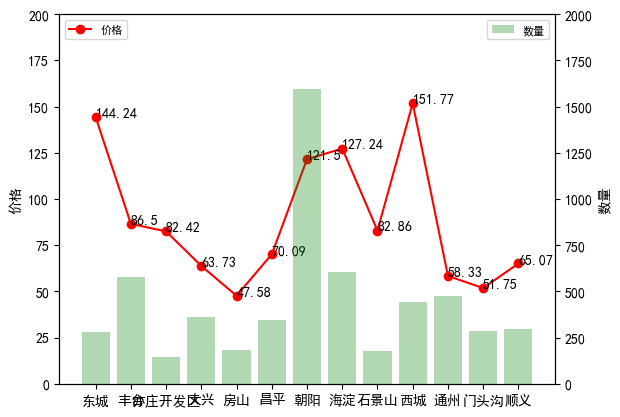

In [19]:
import matplotlib.ticker as mtick
from matplotlib.font_manager import FontProperties
num= df_merge['数量']                 # 数量
price=df_merge['每平米租金(元)'] # 价格
l=[i for i in range(13)]
plt.rcParams['font.sans-serif']=['SimHei'] 
lx=df_merge['区域']
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(l, price,'or-',label='价格')
for i,(_x,_y) in enumerate(zip(l,price)):
    plt.text(_x,_y,price[i],color='black',fontsize=10)  
ax1.set_ylim([0, 200])
ax1.set_ylabel('价格')
plt.legend(prop={'family':'SimHei','size':8},loc='upper left') 
ax2 = ax1.twinx()
plt.bar(l,num,alpha=0.3,color='green',label='数量')
ax2.set_ylabel('数量')
ax2.set_ylim([0, 2000])  
plt.legend(prop={'family':'SimHei','size':8},loc="upper right")
plt.xticks(l,lx)
plt.show()


### 面积区间分析

In [20]:
# 查看房屋的最大面积和最小面积
print('房屋最大面积是%d平米'%(file_data['面积(㎡)'].max()))
print('房屋最小面积是%d平米'%(file_data['面积(㎡)'].min()))
# 查看房租的最高值和最小值
print('房租最高价格为每月%d元'%(file_data['价格(元/月)'].max()))
print('房屋最低价格为每月%d元'%(file_data['价格(元/月)'].min()))

房屋最大面积是1133平米
房屋最小面积是11平米
房租最高价格为每月150000元
房屋最低价格为每月566元


In [21]:
# 面积划分
area_divide = [1, 30, 50, 70, 90, 120, 140, 160, 1200]
area_cut = pd.cut(list(file_data['面积(㎡)']), area_divide)
area_cut_data = area_cut.describe()
area_cut_data

,counts,freqs
categories,,
"(1, 30]",41,0.007102
"(30, 50]",710,0.122986
"(50, 70]",1566,0.271263
"(70, 90]",1094,0.189503
"(90, 120]",1082,0.187424
"(120, 140]",381,0.065997
"(140, 160]",274,0.047462
"(160, 1200]",625,0.108263


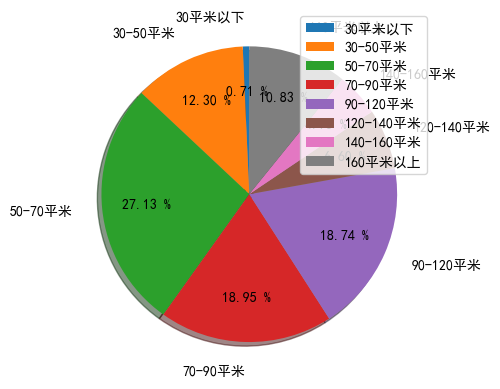

In [22]:
import numpy as np
area_percentage = (area_cut_data['freqs'].values)*100
# 保留两位小数
np.set_printoptions(precision=2)
labels  = ['30平米以下', '30-50平米', '50-70平米', '70-90平米',
'90-120平米','120-140平米','140-160平米','160平米以上']
plt.axes(aspect=1)
plt.pie(x=area_percentage, labels=labels, autopct='%.2f %%',
           shadow=True, labeldistance=1.2, startangle = 90,pctdistance = 0.7)
plt.legend(loc='upper right')
plt.show()